In [80]:
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
visitor = pd.read_csv('visitor_asean.csv')

In [82]:

visitor.describe()
visitor.isnull().sum()

Destination Country      0
Origin Country           0
2015                   210
2016                   383
2017                    55
2018                    85
2019                    97
2020                    75
dtype: int64

In [83]:
for col in ['2015','2016','2017','2018','2019','2020']:
    visitor[col] = visitor[col].fillna(visitor[col].median())


In [86]:
flagged = visitor.copy()
for col in ['2015','2016','2017','2018','2019','2020']:
    Q1 = flagged[col].quantile(0.25)
    Q3 = flagged[col].quantile(0.75)
    IQR = Q3 - Q1
    mark1 = Q1 - 1.5*IQR
    mark2 = Q3 + 1.5*IQR

    lambda x: 'Outlier' if (mark1 < Q1) or (mark2 > Q3) else 'Normal'

flagged.to_csv('flagged.csv', index= True)

In [ ]:
# Dòng này sẽ giữ lại những dòng KHÔNG chứa các cụm từ trên
visitor = visitor[~visitor['Origin Country'].str.contains('Total', case=False, na=False)]

,Destination Country,Origin Country,2015,2016,2017,2018,2019,2020
4,Brunei Darussalam,Australia [AU],9972.0,7989.0,8600.0,9702.0,10188.0,2597.0
5,Brunei Darussalam,Austria [AT],122.0,128.0,101.0,158.0,7403.0,18.0
6,Brunei Darussalam,Bahrain [BH],27.0,19.0,131.0,39.0,7403.0,5.0
7,Brunei Darussalam,Bangladesh [BD],1531.0,2627.0,3553.0,3878.0,3281.0,638.0
8,Brunei Darussalam,Belgium [BE],160.0,137.0,181.0,125.0,7403.0,46.0
...,...,...,...,...,...,...,...,...
902,Viet Nam,Turkey [TR],12267.0,32465.5,13388.0,7199.5,7403.0,1525.5
903,Viet Nam,United Arab Emirates [AE],12267.0,32465.5,954.0,7199.5,7403.0,1525.5
904,Viet Nam,United Kingdom [GB],212798.0,254841.0,283537.0,298114.0,315084.0,81433.0
905,Viet Nam,United States [US],368190.0,552644.0,614117.0,687226.0,746171.0,172706.0


In [96]:
visitor[['Origin Country Name', 'Origin Country Code']] = visitor['Origin Country'].str.extract(r'^(.*?)\s*\[(.*?)\]$')
visitor.reset_index(drop=True)

C:\Users\hary0\AppData\Local\Temp\ipykernel_23844\2517279987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visitor[['Origin Country Name', 'Origin Country Code']] = visitor['Origin Country'].str.extract(r'^(.*?)\s*\[(.*?)\]$')


,Destination Country,Origin Country Name,Origin Country Code,Origin Country,2015,2016,2017,2018,2019,2020
0,Brunei Darussalam,Australia,AU,Australia [AU],9972.0,7989.0,8600.0,9702.0,10188.0,2597.0
1,Brunei Darussalam,Austria,AT,Austria [AT],122.0,128.0,101.0,158.0,7403.0,18.0
2,Brunei Darussalam,Bahrain,BH,Bahrain [BH],27.0,19.0,131.0,39.0,7403.0,5.0
3,Brunei Darussalam,Bangladesh,BD,Bangladesh [BD],1531.0,2627.0,3553.0,3878.0,3281.0,638.0
4,Brunei Darussalam,Belgium,BE,Belgium [BE],160.0,137.0,181.0,125.0,7403.0,46.0
...,...,...,...,...,...,...,...,...,...,...
862,Viet Nam,Turkey,TR,Turkey [TR],12267.0,32465.5,13388.0,7199.5,7403.0,1525.5
863,Viet Nam,United Arab Emirates,AE,United Arab Emirates [AE],12267.0,32465.5,954.0,7199.5,7403.0,1525.5
864,Viet Nam,United Kingdom,GB,United Kingdom [GB],212798.0,254841.0,283537.0,298114.0,315084.0,81433.0
865,Viet Nam,United States,US,United States [US],368190.0,552644.0,614117.0,687226.0,746171.0,172706.0


In [98]:
visitor.drop(columns= 'Origin Country')

,Destination Country,Origin Country Name,Origin Country Code,2015,2016,2017,2018,2019,2020
4,Brunei Darussalam,Australia,AU,9972.0,7989.0,8600.0,9702.0,10188.0,2597.0
5,Brunei Darussalam,Austria,AT,122.0,128.0,101.0,158.0,7403.0,18.0
6,Brunei Darussalam,Bahrain,BH,27.0,19.0,131.0,39.0,7403.0,5.0
7,Brunei Darussalam,Bangladesh,BD,1531.0,2627.0,3553.0,3878.0,3281.0,638.0
8,Brunei Darussalam,Belgium,BE,160.0,137.0,181.0,125.0,7403.0,46.0
...,...,...,...,...,...,...,...,...,...
902,Viet Nam,Turkey,TR,12267.0,32465.5,13388.0,7199.5,7403.0,1525.5
903,Viet Nam,United Arab Emirates,AE,12267.0,32465.5,954.0,7199.5,7403.0,1525.5
904,Viet Nam,United Kingdom,GB,212798.0,254841.0,283537.0,298114.0,315084.0,81433.0
905,Viet Nam,United States,US,368190.0,552644.0,614117.0,687226.0,746171.0,172706.0


In [112]:
# Danh sách các cột năm cần chuyển đổi
year_columns = ['2015', '2016', '2017', '2018', '2019', '2020']

# 1. Làm tròn tất cả các giá trị trong các cột năm
visitor[year_columns] = visitor[year_columns].round(0)
visitor.drop(columns= 'Origin Country',axis=1,inplace=True)


C:\Users\hary0\AppData\Local\Temp\ipykernel_23844\1913413126.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visitor[year_columns] = visitor[year_columns].round(0)
C:\Users\hary0\AppData\Local\Temp\ipykernel_23844\1913413126.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visitor.drop(columns= 'Origin Country',axis=1,inplace=True)


In [117]:
visitor.reset_index(drop=True, inplace=True)

In [120]:
visitor.to_csv('visitor_cleaned.csv')

In [90]:
col_index = visitor.columns.get_loc('Destination Country')
country_col = visitor.pop('Origin Country Name')
visitor.insert(col_index +1, 'Origin Country Name', country_col)

code_col = visitor.pop('Origin Country Code')
visitor.insert(col_index +2, 'Origin Country Code', code_col )
visitor

,Destination Country,Origin Country Name,Origin Country Code,Origin Country,2015,2016,2017,2018,2019,2020
4,Brunei Darussalam,Australia,AU,Australia [AU],9972.0,7989.0,8600.0,9702.0,10188.0,2597.0
5,Brunei Darussalam,Austria,AT,Austria [AT],122.0,128.0,101.0,158.0,7403.0,18.0
6,Brunei Darussalam,Bahrain,BH,Bahrain [BH],27.0,19.0,131.0,39.0,7403.0,5.0
7,Brunei Darussalam,Bangladesh,BD,Bangladesh [BD],1531.0,2627.0,3553.0,3878.0,3281.0,638.0
8,Brunei Darussalam,Belgium,BE,Belgium [BE],160.0,137.0,181.0,125.0,7403.0,46.0
...,...,...,...,...,...,...,...,...,...,...
902,Viet Nam,Turkey,TR,Turkey [TR],12267.0,32465.5,13388.0,7199.5,7403.0,1525.5
903,Viet Nam,United Arab Emirates,AE,United Arab Emirates [AE],12267.0,32465.5,954.0,7199.5,7403.0,1525.5
904,Viet Nam,United Kingdom,GB,United Kingdom [GB],212798.0,254841.0,283537.0,298114.0,315084.0,81433.0
905,Viet Nam,United States,US,United States [US],368190.0,552644.0,614117.0,687226.0,746171.0,172706.0


In [91]:

visitor.drop(columns='Origin Country')
visitor

,Destination Country,Origin Country Name,Origin Country Code,Origin Country,2015,2016,2017,2018,2019,2020
4,Brunei Darussalam,Australia,AU,Australia [AU],9972.0,7989.0,8600.0,9702.0,10188.0,2597.0
5,Brunei Darussalam,Austria,AT,Austria [AT],122.0,128.0,101.0,158.0,7403.0,18.0
6,Brunei Darussalam,Bahrain,BH,Bahrain [BH],27.0,19.0,131.0,39.0,7403.0,5.0
7,Brunei Darussalam,Bangladesh,BD,Bangladesh [BD],1531.0,2627.0,3553.0,3878.0,3281.0,638.0
8,Brunei Darussalam,Belgium,BE,Belgium [BE],160.0,137.0,181.0,125.0,7403.0,46.0
...,...,...,...,...,...,...,...,...,...,...
902,Viet Nam,Turkey,TR,Turkey [TR],12267.0,32465.5,13388.0,7199.5,7403.0,1525.5
903,Viet Nam,United Arab Emirates,AE,United Arab Emirates [AE],12267.0,32465.5,954.0,7199.5,7403.0,1525.5
904,Viet Nam,United Kingdom,GB,United Kingdom [GB],212798.0,254841.0,283537.0,298114.0,315084.0,81433.0
905,Viet Nam,United States,US,United States [US],368190.0,552644.0,614117.0,687226.0,746171.0,172706.0


<Axes: title={'center': 'Tổng lượng khách du lịch toàn cầu theo năm'}>

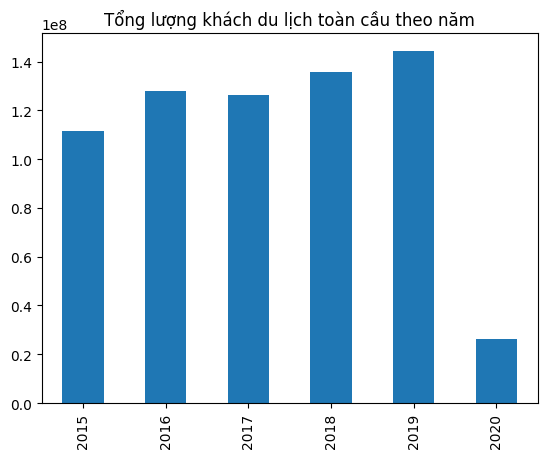

In [92]:
visitor_year = visitor[['2015','2016','2017','2018','2019','2020']].sum()
visitor_year.plot(kind='bar', title='Tổng lượng khách du lịch toàn cầu theo năm')


In [93]:
vietnam =visitor[visitor['Destination Country'] == 'Viet Nam']
top_origin = vietnam.sort_values(by='2019', ascending=False).head(10)

top_origin

,Destination Country,Origin Country Name,Origin Country Code,Origin Country,2015,2016,2017,2018,2019,2020
864,Viet Nam,China,CN,China [CN],1780918.0,2696848.0,4008253.0,4966468.0,5806425.0,871819.0
879,Viet Nam,Korea,KR,Korea [KR],1112978.0,1543883.0,2415245.0,3485406.0,4290802.0,819089.0
877,Viet Nam,Japan,JP,Japan [JP],671379.0,740592.0,798119.0,826674.0,951962.0,200346.0
900,Viet Nam,Taiwan Province of China,TW,Taiwan Province of China [TW],330196.0,507301.0,616232.0,714112.0,926744.0,192216.0
905,Viet Nam,United States,US,United States [US],368190.0,552644.0,614117.0,687226.0,746171.0,172706.0
893,Viet Nam,Russia,RU,Russia [RU],338843.0,433987.0,574164.0,606637.0,646524.0,244966.0
882,Viet Nam,Malaysia,MY,Malaysia [MY],346584.0,407574.0,480456.0,540119.0,606206.0,116221.0
889,Viet Nam,Others Unspecified Countries,O0,Others Unspecified Countries [O0],299075.0,544458.0,256166.0,381612.0,514324.0,190276.0
901,Viet Nam,Thailand,TH,Thailand [TH],214645.0,266984.0,301587.0,349310.0,509802.0,125725.0
856,Viet Nam,Australia,AU,Australia [AU],303721.0,320678.0,370438.0,386934.0,383511.0,92227.0


<Axes: title={'center': 'Top địa điểm du lịch nổi tiếng nhất Đông Nam á năm 2020'}, xlabel='Destination Country'>

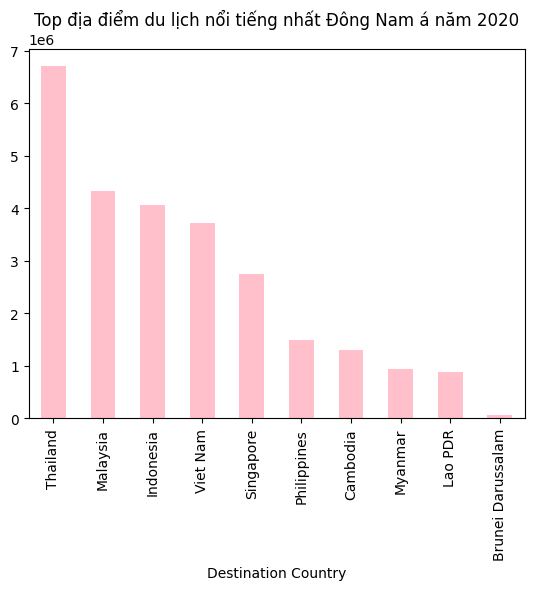

In [94]:
top_destination_country = visitor.groupby('Destination Country')['2020'].sum().sort_values(ascending = False).head(10)
top_destination_country.plot(
    kind='bar',
    color ='pink',
    title ='Top địa điểm du lịch nổi tiếng nhất Đông Nam á năm 2020'
)

In [95]:

visitor.to_csv('raw.csv')